# **2. Feature Engineering / Embedding : -**

In [ ]:
!pip install tensorflow-hub

In [ ]:
!pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 17.9 MB/s eta 0:00:00


In [ ]:
import nltk
import warnings
import numpy as np
import pandas as pd
pd.set_option('max_colwidth', 600)
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.6)
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
from collections import defaultdict
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, SnowballStemmer
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
from tqdm import tqdm
import os
import gensim
import random
import collections
import re
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from gensim import models, corpora, similarities
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import NMF
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "/content/drive/My Drive/Design Project"

/content/drive/My Drive/Design Project


In [ ]:
ls

'Design Project - ** 1. Pre-Processing.ipynb'
'Design Project - ** 2. Feature Engineering   Embedding.ipynb'
 Design_Project_Code_2_for_submission_ipynb.ipynb
'google news vectors'
 GoogleNews-vectors-negative300.bin.gz
 model_dir/
 preprocessed_test_data.csv
 preprocessed_train_data.csv
 preprocessed_valid_data.csv
 proppy_1.0.dev.tsv
 proppy_1.0.test.tsv
 proppy_1.0.train.tsv


In [ ]:
train_data = pd.read_csv('preprocessed_train_data.csv')
test_data = pd.read_csv('preprocessed_test_data.csv')
valid_data = pd.read_csv('preprocessed_valid_data.csv')

In [ ]:
train_data.head()

,text_preprocessed,propaganda_label
0,et tu rhody recent editorial providence journal cataloged everything could find wrong connecticut ended suggestion gov gina raimondo see least job could come rhode island certainly le risky nutmeg state beg pardon state world famous pension problem persistent economic issue le risky journal reported week ago rhode island significant economic problem many way reflect connecticut rhode island enjoys legacy corruption even connecticut match projo pulitzer prize uncovering widespread corruption within court system exactly gained moving rhode island like connecticut rhode island income tax esta...,-1
1,recent post farmington mirror town version onion encouraged parent take advantage shuttle service offered town brings child school location close proximity home also free decision follows complaint made social medium regarding long parent drop line post read mirror note shuttle easily identifiable bright yellow color traffic stopping flashing red light appears practice driving student school privately owned car began sometime 1980s school thing drop line mid 2000s parent seemed aghast learn actually let child ride school bus sometimes way moved house within walking distance neighborhood el...,-1
2,president donald trump often responding natural disaster mass shooting unfolding crisis spent much time congratulating responder rather memorializing victim wednesday school shooting visit friday trump two quick visit hospital sheriff office near school killed score injured praised doctor police officer fire official others responded quickly mass shooting parkland florida casting response heroic record setting incredible job everybody talking trump said response dozen officer flanked around large circular conference room table fifth floor broward county sheriff office trump said saw victim...,-1
3,february black history month nothing loom larger black history evil specter slavery three exhibit state take subject two inspired notorious slave trading center shore africa third pay tribute legendary escaped slave abolitionist leader frederick douglas door return robert charles hudson haunted might called corridor doom pathway arena trod ill fated roman gladiator queue walked concentration camp inmate toward gas chamber hudson exhibit hartford public library artwalk gallery door return focus one corridor kidnapped african walked ship headed america door metaphor man inhumanity man enslav...,-1
4,snow heavy whipped gusting wind travel nearly impossible thousand abandoned car ambulance could pas massive drift cohort four wheel drive owner called upon gov ella grasso aid rescue courant reporter david bailey wrote transportation shamble snow reported made walking nearly dangerous driving many sought shelter wherever could year since blizzard snow record stand day leading storm forecaster warned could wallop state right area saw much foot snow driven drift high wind grasso declared state emergency urged car road many stuck people futile attempt get home business told shutter well shutd...,-1


## **2.1 Count Vectorizer (BoW) - Bag of Words**

In [ ]:
# Select the features and the target
X = train_data["text_preprocessed"]
y = train_data["propaganda_label"]

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

In [ ]:
# Set an bog of words object
text_ext_bow = CountVectorizer(analyzer='word',
                                ngram_range=(1, 3),
                                stop_words="english",
                                min_df = 100,
                                max_df = 0.90)

# Extracting features using train data
text_ext_bow.fit(train_data.text_preprocessed)

CountVectorizer(max_df=0.9, min_df=100, ngram_range=(1, 3),
                stop_words='english')

In [ ]:
text_ext_bow.get_feature_names_out()[1000:1010]

array(['bedroom', 'bee', 'beef', 'beer', 'began', 'begging', 'begin',
       'beginning', 'begun', 'behalf'], dtype=object)

In [ ]:
len(text_ext_bow.get_feature_names_out())

12303

In [ ]:
# Transform data into bag or words encoded features
X_train_bow = text_ext_bow.transform(train_data["text_preprocessed"])
X_valid_bow = text_ext_bow.transform(valid_data["text_preprocessed"])
X_test_bow  = text_ext_bow.transform(test_data["text_preprocessed"])

X_train_bow.shape, X_valid_bow.shape, X_test_bow.shape

((35986, 12303), (5125, 12303), (10159, 12303))

In [ ]:
X_train_bow

<35986x12303 sparse matrix of type '<class 'numpy.int64'>'
	with 6805557 stored elements in Compressed Sparse Row format>

In [ ]:
len(y_train)

28788

In [ ]:
mask = np.where(X_train_bow.toarray()[0, :] > 0)
X_train_bow.toarray()[0, mask]

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  2,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1, 23,  2,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  3,  2,  2,  2,  3,  1,  1,  2,
         1,  2,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  2,  2,  1,  1,  2,  1,  1,  1,  2,
        23,  2,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  3,  2,  1,  2,  1,  1,  1,  1,  1,  1,  2,  1,
         1,  1,  2,  2,  2,  1,  4,  1,  1,  1,  1,  1,  1,  5,  1,  1,
         2,  1,  2,  1,  1,  1,  1,  1,  1,  4, 24, 23,  2,  1,  1,  1,
         1,  1,  1,  1, 10,  1,  1,  1,  1,  1,  1,  1,  1,  1,  4,  1,
         1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  2,  2,  1,  1,  1,  1,
         1,  1,  1,  1]])

## **2.2 TfIdf Vectorizer**

In [ ]:
# Setting bag of words object
text_ext_tfidf = TfidfVectorizer(analyzer='word',
                                ngram_range=(1, 3),
                                stop_words="english",
                                min_df = 100,
                                max_df = 0.90)

# Extracting features using train data
text_ext_tfidf.fit(train_data.text_preprocessed)

TfidfVectorizer(max_df=0.9, min_df=100, ngram_range=(1, 3),
                stop_words='english')

In [ ]:
text_ext_tfidf.get_feature_names_out()[1000:1010]

array(['bedroom', 'bee', 'beef', 'beer', 'began', 'begging', 'begin',
       'beginning', 'begun', 'behalf'], dtype=object)

In [ ]:
len(text_ext_bow.get_feature_names_out())

12303

In [ ]:
# Transform data into bag or words encoded features
X_train_tfidf = text_ext_tfidf.transform(train_data["text_preprocessed"])
X_valid_tfidf = text_ext_tfidf.transform(valid_data["text_preprocessed"])
X_test_tfidf  = text_ext_tfidf.transform(test_data["text_preprocessed"])

X_train_tfidf.shape, X_valid_tfidf.shape, X_test_tfidf.shape

((35986, 12303), (5125, 12303), (10159, 12303))

In [ ]:
X_train_tfidf

<35986x12303 sparse matrix of type '<class 'numpy.float64'>'
	with 6805557 stored elements in Compressed Sparse Row format>

In [ ]:
mask = np.where(X_train_tfidf.toarray()[0, :] > 0)
X_train_tfidf.toarray()[0, mask]

array([[0.010875  , 0.01921252, 0.01391974, 0.02267633, 0.0143199 ,
        0.01136256, 0.01139362, 0.02265371, 0.01262468, 0.05673645,
        0.02321471, 0.02371577, 0.01028989, 0.01731895, 0.01733879,
        0.01419765, 0.01710776, 0.02162504, 0.01423862, 0.00820729,
        0.01326879, 0.02388249, 0.01689536, 0.01380496, 0.42426726,
        0.02960081, 0.01197391, 0.0097762 , 0.0133655 , 0.0113571 ,
        0.01219383, 0.00991324, 0.01859965, 0.0153289 , 0.01662534,
        0.01410321, 0.01308003, 0.01090442, 0.01778929, 0.0143773 ,
        0.03469702, 0.026667  , 0.03740152, 0.02680209, 0.05840191,
        0.02258672, 0.01419358, 0.03589076, 0.02192343, 0.02459577,
        0.01669921, 0.02089792, 0.01494852, 0.01241123, 0.01866431,
        0.01715466, 0.01683881, 0.02040106, 0.01463053, 0.0154869 ,
        0.01722619, 0.0139939 , 0.02381912, 0.01824764, 0.02065983,
        0.0206855 , 0.0092429 , 0.01599494, 0.0197028 , 0.02241407,
        0.01476912, 0.04567773, 0.01875679, 0.01

## **2.3 Word2Vec**

In [ ]:
# Training our own Word2Vec model using our own text corpus

list_of_articles=[]

for article in train_data["text_preprocessed"]:
    list_of_articles.append(article.split())

In [ ]:
list_of_articles[:2]

[['et',
  'tu',
  'rhody',
  'recent',
  'editorial',
  'providence',
  'journal',
  'cataloged',
  'everything',
  'could',
  'find',
  'wrong',
  'connecticut',
  'ended',
  'suggestion',
  'gov',
  'gina',
  'raimondo',
  'see',
  'least',
  'job',
  'could',
  'come',
  'rhode',
  'island',
  'certainly',
  'le',
  'risky',
  'nutmeg',
  'state',
  'beg',
  'pardon',
  'state',
  'world',
  'famous',
  'pension',
  'problem',
  'persistent',
  'economic',
  'issue',
  'le',
  'risky',
  'journal',
  'reported',
  'week',
  'ago',
  'rhode',
  'island',
  'significant',
  'economic',
  'problem',
  'many',
  'way',
  'reflect',
  'connecticut',
  'rhode',
  'island',
  'enjoys',
  'legacy',
  'corruption',
  'even',
  'connecticut',
  'match',
  'projo',
  'pulitzer',
  'prize',
  'uncovering',
  'widespread',
  'corruption',
  'within',
  'court',
  'system',
  'exactly',
  'gained',
  'moving',
  'rhode',
  'island',
  'like',
  'connecticut',
  'rhode',
  'island',
  'income',
  

In [ ]:
# training Word2Vectors

w2v_model = Word2Vec(list_of_articles, min_count=5, vector_size=50, workers=-1) # min_count = 5 considers only words that occured atleast 5 times

print(w2v_model.wv.most_similar('help'))

print('='*50)

print(w2v_model.wv.most_similar('economy'))

[('havoc', 0.5492247939109802), ('itn', 0.5423970818519592), ('leela', 0.524662971496582), ('arish', 0.5174168944358826), ('briggs', 0.512290894985199), ('pantomime', 0.5026400685310364), ('winder', 0.49956485629081726), ('bugged', 0.4954789876937866), ('dig', 0.49345827102661133), ('secularized', 0.4920485317707062)]
[('ape', 0.5155240893363953), ('algal', 0.5006822347640991), ('radium', 0.49881812930107117), ('jci', 0.4888591766357422), ('alright', 0.4875359535217285), ('conveyance', 0.48692092299461365), ('soften', 0.4863470494747162), ('kontar', 0.482387900352478), ('throwback', 0.48237770795822144), ('luzon', 0.48204097151756287)]


In [ ]:
w2v_words = list(w2v_model.wv.index_to_key)

print("number of words that occured minimum 5 times ", len(w2v_words))

print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  56479
sample words  ['said', 'year', 'u', 'trump', 'state', 'would', 'one', 'also', 'people', 'president', 'time', 'new', 'government', 'two', 'country', 'last', 'say', 'day', 'could', 'first', 'like', 'may', 'right', 'told', 'police', 'school', 'house', 'official', 'law', 'according', 'iran', 'court', 'american', 'group', 'news', 'many', 'even', 'party', 'make', 'report', 'israel', 'week', 'minister', 'get', 'world', 'made', 'case', 'woman', 'north', 'month']


**Converting text into vectors using Avg W2V - this way we get the semantic meaning**

## **2.4 Avg W2v**

In [ ]:
# computing average word2vec for each article

sent_vectors = [] # the avg-w2v for each sentence/article is stored in this list

for sent in tqdm(list_of_articles): # for each article/sentence

    sent_vec = np.zeros(50) # as word vectors are of zero length 50

    cnt_words = 0; # num of words with a valid vector in the sentence/article

    for word in sent: # for each word in a review/sentence

        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1

    if cnt_words != 0:
        sent_vec /= cnt_words

    sent_vectors.append(sent_vec)

print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|██████████| 35986/35986 [1:08:54<00:00,  8.70it/s]

35986
50


In [ ]:
sent_vectors[0]

array([ 8.65828632e-04,  1.02827640e-03, -8.54108977e-04, -6.76663258e-04,
       -6.94351536e-04,  1.61986714e-03, -1.64158294e-03, -1.18141931e-03,
       -1.65875413e-03,  3.40444270e-04,  1.27271702e-04, -8.64588574e-04,
        3.86860778e-04,  6.03880875e-04,  1.81738141e-03,  4.65168278e-04,
        6.22690346e-06, -5.92345162e-05,  2.82728439e-03,  2.42226876e-04,
        1.19153957e-03, -9.45039109e-04, -2.59311793e-03,  6.20223465e-04,
        1.53008507e-04, -1.89369410e-05,  9.13673609e-04,  1.00221133e-03,
       -2.25326775e-03,  1.14182714e-03,  1.54390144e-05,  1.74875076e-04,
       -1.44616025e-03,  3.03860526e-04, -9.84340640e-04,  1.14266632e-03,
       -6.07049592e-04,  5.81384449e-04,  5.64650099e-05, -1.80691659e-03,
       -1.37323126e-03, -4.82655752e-04,  7.79024283e-04, -1.47284330e-03,
       -1.52605132e-04,  4.68748685e-04, -2.15216093e-03, -9.71114325e-04,
        2.14216947e-03,  1.43717366e-03])

## **2.5 Google News vectors -Using pre-trained word vectors -It is trained on a 3 billion word Google News corpus in 2015. In total, there are 3 million, 300-dimension vectors.**

In [ ]:
%%time

# Path to dataset
word2vec_path = "/content/drive/My Drive/Design Project/GoogleNews-vectors-negative300.bin.gz"

# Load 200,000 most common words
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=200000)

CPU times: user 4.31 s, sys: 240 ms, total: 4.55 s
Wall time: 8.06 s


In [ ]:
# Get word vector
test_word = word2vec_model['science']

# Print shape and vector
print('Vector dimension:', test_word.shape)
print(test_word)

Vector dimension: (300,)
[ 0.0090332   0.12158203  0.3984375   0.21386719 -0.01672363  0.06396484
  0.3125     -0.23535156 -0.10009766 -0.09326172  0.20507812 -0.03222656
 -0.21191406  0.00958252 -0.27734375  0.09619141 -0.1875     -0.04052734
  0.2265625  -0.23632812 -0.04858398  0.03295898 -0.08056641  0.12255859
  0.05859375 -0.09130859 -0.02685547  0.02587891 -0.11376953 -0.21972656
 -0.0378418  -0.15722656 -0.05981445 -0.01635742  0.11425781 -0.15234375
 -0.01086426  0.29296875  0.22265625 -0.00245667 -0.16308594 -0.11669922
 -0.20800781  0.31835938 -0.08740234  0.13378906  0.15429688  0.11816406
 -0.07470703  0.09326172 -0.32421875  0.01239014 -0.07226562 -0.10986328
 -0.07177734  0.16113281  0.05541992 -0.3984375  -0.04980469 -0.25195312
 -0.05249023 -0.05786133  0.16699219 -0.26953125 -0.04394531 -0.14257812
  0.03662109  0.34765625 -0.10888672 -0.12011719 -0.19335938 -0.21972656
  0.16015625 -0.06542969 -0.22070312  0.1484375   0.23144531  0.11669922
 -0.15429688  0.04174805 -

In [ ]:
# Query word vectors
word = 'Trump'
most_similar_words = word2vec_model.most_similar(word)
similarity_score = word2vec_model.similarity('Trump', 'politics')

print(f"Most similar words to '{word}': {most_similar_words}")
print(f"Similarity score between 'Trump' and 'politics': {similarity_score}")

Most similar words to 'Trump': [('Donald_Trump', 0.8103920221328735), ('Ivanka_Trump', 0.5924582481384277), ('Ivanka', 0.560720682144165), ('Trump_Tower', 0.548555314540863), ('Celebrity_Apprentice', 0.5199690461158752), ('real_estate_mogul', 0.5094897150993347), ('Ivana_Trump', 0.4968179762363434), ('Trump_Hotels', 0.4907776415348053), ('Apprentice', 0.47915542125701904), ('Trump_Entertainment', 0.4712991416454315)]
Similarity score between 'Trump' and 'politics': 0.14169859886169434


In [ ]:
# Query word vectors
word = 'economy'
most_similar_words = word2vec_model.most_similar(word)
similarity_score = word2vec_model.similarity('economy', 'growth')

print(f"Most similar words to '{word}': {most_similar_words}")
print(f"Similarity score between 'economy' and 'growth': {similarity_score}")

Most similar words to 'economy': [('economic', 0.7219074368476868), ('economies', 0.6638296842575073), ('recession', 0.6335979104042053), ('GDP', 0.5781735181808472), ('Economy', 0.5592846274375916), ('sector', 0.5568294525146484), ('economic_downturn', 0.5528045892715454), ('deepest_recession', 0.549365758895874), ('slowdown', 0.5454618334770203), ('downturn', 0.5375552773475647)]
Similarity score between 'economy' and 'growth': 0.4983152151107788


In [ ]:
word2vec_model.most_similar(positive=['economy'], topn=10)

[('economic', 0.7219074368476868),
 ('economies', 0.6638296842575073),
 ('recession', 0.6335979104042053),
 ('GDP', 0.5781735181808472),
 ('Economy', 0.5592846274375916),
 ('sector', 0.5568294525146484),
 ('economic_downturn', 0.5528045892715454),
 ('deepest_recession', 0.549365758895874),
 ('slowdown', 0.5454618334770203),
 ('downturn', 0.5375552773475647)]

In [ ]:
word2vec_model.most_similar(negative=['economy'], topn=10)

[('Rem', 0.1816815882921219),
 ('Dijon', 0.17077745497226715),
 ('Argent', 0.15418335795402527),
 ('Observation', 0.14996370673179626),
 ('Knock_Out', 0.14893844723701477),
 ('avec', 0.14740154147148132),
 ('Trace', 0.14676298201084137),
 ('Maroon', 0.14359945058822632),
 ('Activated', 0.14344659447669983),
 ('LBL', 0.14251209795475006)]

**Visualizing the word vectors in 2 dimensions by using PCA for word2vec using google news vectors**

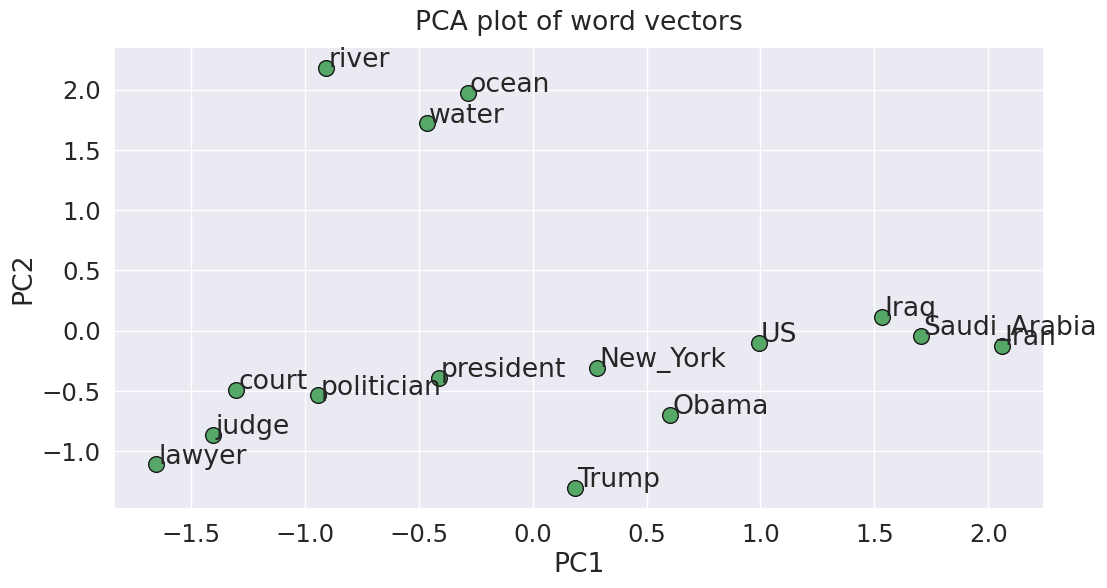

In [ ]:
# Vectors to transform
words = ["court","judge","lawyer","river","ocean","water","politician","Trump","US", "Obama", 'president','New_York',"Saudi_Arabia","Iran","Iraq"] #['swim', 'swimming', 'cat', 'dog', 'feline', 'road', 'car', 'bus']
word_vectors = np.array([word2vec_model[w] for w in words])

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(word_vectors)

# Plot transformed vectors
plt.figure(figsize=(12,6))
plt.scatter(X_pca[:,0], X_pca[:,1], edgecolors='k', c='g', s=128)
for word, (x,y) in zip(words, X_pca):
    plt.text(x+0.01,y+0.01, word)
plt.title("PCA plot of word vectors", y=1.02)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
word2vec_model.most_similar(positive=["woman", "king"], negative=["man"], topn=3)

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951)]

The ability to solve analogies is one of the most exciting features of Word2vec. It allows us to make connections between words and concepts that we might not have seen before. With gensim, all we need to do is input the positive and negative terms, and it will provide us with the closest vector to the result. The operation "man"-"woman"+"king" is performed on the Word2vec model to solve the analogy. The result is "queen" because we are removing the man gender here. We are retrieving the top three most similar words to the result using the most_similar() function.

## **2.6. Topic Modelling with LDA**

In [ ]:
# Building a dictionary of (token, ID) mappings
dct = corpora.Dictionary(list_of_articles)

# Printing the vocab size
print('Size of vocabulary before filtering:', len(dct))

# Filtering overly low and high frequency tokens
dct.filter_extremes(no_below=5, no_above=0.5)

Size of vocabulary before filtering: 192892


In [ ]:
# Printing the vocab size

print('\nSize of vocabulary after filtering:', len(dct))


Size of vocabulary after filtering: 44554


In [ ]:
# Checking the mappings

print("\nExample mappings:", [(i,dct.token2id[i]) for i in list_of_articles[1][:10]])


Example mappings: [('recent', 164), ('post', 380), ('farmington', 288), ('mirror', 352), ('town', 445), ('version', 452), ('onion', 364), ('encouraged', 280), ('parent', 369), ('take', 437)]


In [ ]:
# Vectorizing the tokenized text into a Bag-of-Words matrix

bow = [dct.doc2bow(i) for i in list_of_articles]

In [ ]:
# Training the LDA model

lda_model = models.LdaModel(corpus=bow, num_topics=10, passes=10, alpha='auto', eta='auto', id2word=dct, random_state=0)

In [ ]:
# Printing generated topics

lda_model.print_topics()

[(0,
  '0.024*"u" + 0.022*"iran" + 0.022*"israel" + 0.018*"trump" + 0.014*"nuclear" + 0.012*"deal" + 0.011*"president" + 0.011*"state" + 0.009*"israeli" + 0.008*"united"'),
 (1,
  '0.009*"company" + 0.008*"new" + 0.006*"million" + 0.005*"percent" + 0.005*"business" + 0.004*"government" + 0.004*"billion" + 0.004*"state" + 0.004*"tax" + 0.004*"u"'),
 (2,
  '0.018*"court" + 0.012*"law" + 0.011*"case" + 0.008*"government" + 0.006*"state" + 0.006*"justice" + 0.006*"federal" + 0.006*"charge" + 0.006*"judge" + 0.005*"criminal"'),
 (3,
  '0.010*"people" + 0.007*"right" + 0.006*"american" + 0.005*"state" + 0.005*"even" + 0.005*"many" + 0.004*"woman" + 0.004*"muslim" + 0.004*"student" + 0.004*"world"'),
 (4,
  '0.015*"north" + 0.013*"korea" + 0.011*"country" + 0.011*"minister" + 0.010*"party" + 0.009*"president" + 0.009*"kim" + 0.008*"korean" + 0.008*"south" + 0.008*"government"'),
 (5,
  '0.025*"trump" + 0.014*"president" + 0.008*"house" + 0.008*"democrat" + 0.007*"republican" + 0.007*"state" +

In [ ]:
print(lda_model.alpha) # Document-topic prior

print(lda_model.eta) # Topic-word prior (beta)

[0.08676772 0.19457345 0.14405614 0.19015646 0.10882247 0.13280284
 0.13757288 0.10960348 0.19024125 0.0984373 ]
[0.07130837 1.9521214  0.07924781 ... 0.06555445 0.06561302 0.0655751 ]


In [ ]:
# Top topics in the corpus

# Loading the topics
topics = list(lda_model.get_document_topics(bow, minimum_probability=0))

# Printing the topic proportion in corpus
for i in range(10):
    print(f"Topic {i} proportion: {100*sum([pair[i][1] for pair in topics])/len(topics):.1f}%")

Topic 0 proportion: 7.8%
Topic 1 proportion: 13.4%
Topic 2 proportion: 9.3%
Topic 3 proportion: 9.9%
Topic 4 proportion: 9.7%
Topic 5 proportion: 10.9%
Topic 6 proportion: 10.8%
Topic 7 proportion: 7.2%
Topic 8 proportion: 13.1%
Topic 9 proportion: 7.8%


In [ ]:
# Evaluating the topics
# Coherence score (closer to 0 the better)

coherence_model = models.coherencemodel.CoherenceModel(model=lda_model, texts=list_of_articles, dictionary=dct, coherence='u_mass')

coherence_score = coherence_model.get_coherence()

print(f'Coherence Score: {coherence_score:.4f}')

Coherence Score: -1.3579


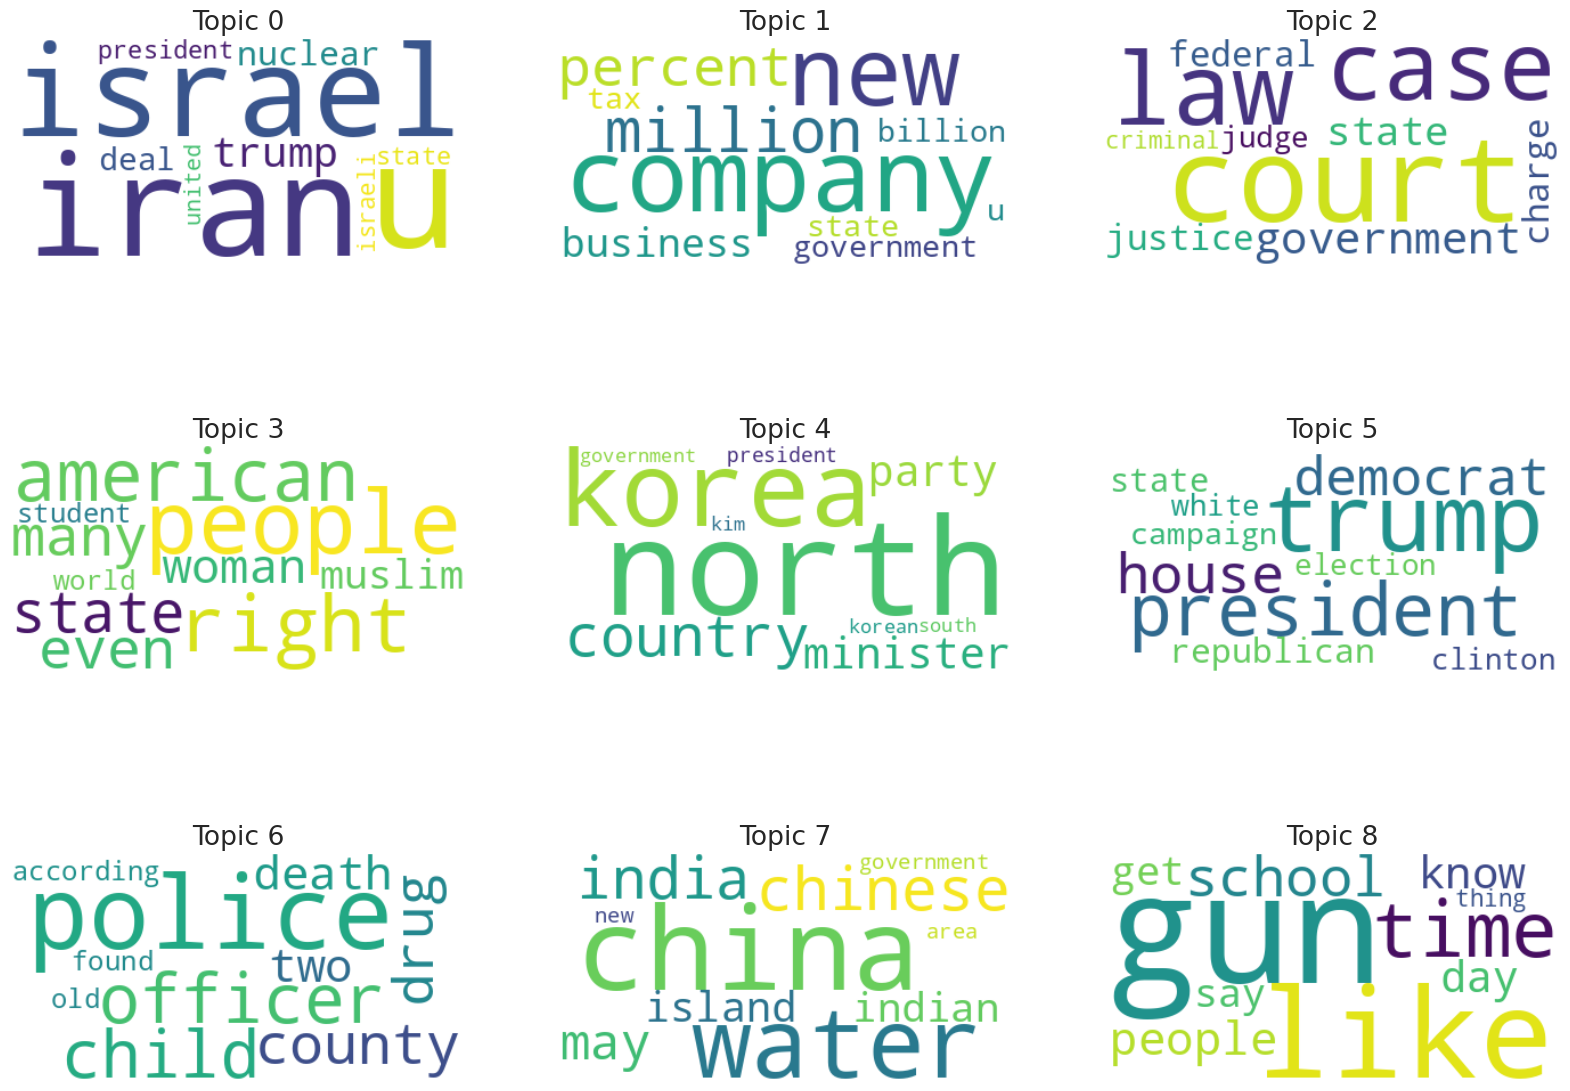

In [ ]:
# Visualizing Topics
# Plot word clouds for each topic
word_cloud = WordCloud(background_color='white', max_words=10)
fig, axes = plt.subplots(3, 3, figsize=(20,15))

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(lda_model.show_topic(i))
    word_cloud.generate_from_frequencies(topic_words)
    plt.gca().imshow(word_cloud, interpolation='bilinear')
    plt.gca().set_title(f'Topic {i}')
    plt.gca().axis('off')
plt.show()

## **2.7.Word embeddings with ELMo**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
elmo = hub.load("https://tfhub.dev/google/elmo/3")

In [ ]:
train_data[train_data["propaganda_label"]==1]

,text,propaganda_label,text_preprocessed
31965,"NEW YORK — A Dominican national was sentenced Friday to an additional 30 years’ imprisonment after being convicted of hiring others to viciously slash his ex-girlfriend (“Victim-1”) on June 2, 2015 in the Bronx, New York, and to murder her boyfriend (“Victim-2”) on March 20, 2016 in Santo Domingo, Dominican Republic. Omar Adonis Guzman-Martinez, 46, planned and caused others to carry out those crimes while incarcerated in the Federal Correctional Institution at Fort Dix, New Jersey (“FCI Fort Dix”), using contraband cellphones to stalk, threaten, and induce others to commit crimes of viol...",1,new york dominican national sentenced friday additional year imprisonment convicted hiring others viciously slash ex girlfriend victim june bronx new york murder boyfriend victim march santo domingo dominican republic omar adonis guzman martinez planned caused others carry crime incarcerated federal correctional institution fort dix new jersey fci fort dix using contraband cellphone stalk threaten induce others commit crime violence victim even incarcerated guzman martinez thought law command one individual slashed another murdered said angel melendez special agent charge hsi new york clea...
31966,"Samuel Rahamin Topaz, 24, of Fort Lee, New Jersey, was sentenced today to eight years in prison, to be followed by a lifetime of supervised release, for conspiring to provide material support to the Islamic State of Iraq and al-Sham (ISIS), a designated foreign terrorist organization. According to documents filed in this and related cases, and statements made in court: Topaz admitted that prior to his arrest by the FBI Joint Terrorism Task Force on June 17, 2015, he planned to travel overseas to join ISIS and saved money for that purpose. Topaz discussed plans to join ISIS with Nader Saa...",1,samuel rahamin topaz fort lee new jersey sentenced today eight year prison followed lifetime supervised release conspiring provide material support islamic state iraq al sham isi designated foreign terrorist organization according document filed related case statement made court topaz admitted prior arrest fbi joint terrorism task force june planned travel overseas join isi saved money purpose topaz discussed plan join isi nader saadeh alaa saadeh munther omar saleh admitted various time indicated wanted join isi topaz also admitted defendant watched isi related video depicted execution no...
31967,"OREGON — Oregon Department of Fish and Wildlife (ODFW) and OSP Fish & Wildlife Troopers successfully removed arrows from deer illegally shot in Shady Cove. Two deer, illegally shot with arrows in the Shady Cove area, were successfully tranquilized yesterday and the arrows removed. ODFW wildlife biologists and OSP Fish & Wildlife Troopers worked together to track and tranquilize the deer, remove the arrows and treat the wounds. The deer, an adult doe and a yearling doe, were successfully released in good health with no visible infection. “Pictures of these does stuck with arrows have bee...",1,oregon oregon department fish wildlife odfw osp fish wildlife trooper successfully removed arrow deer illegally shot shady cove two deer illegally shot arrow shady cove area successfully tranquilized yesterday arrow removed odfw wildlife biologist osp fish wildlife trooper worked together track tranquilize deer remove arrow treat wound deer adult doe yearling doe successfully released good health visible infection picture stuck arrow circulating widely medium social medium understandably upsetting see happy say arrow removed deer good chance survival said steve niemela rogue district wildl...
31968,"A North Carolina man, who previously lived in Frederick County, Virginia, was sentenced today on federal wire fraud conspiracy charges. Michael Dean Kent, 58, of Franklin, North Carolina, was sentenced to serve 63 months in prison. According to admissions made as part of his guilty plea, between 2014 and 2017, Kent and his co-

In [ ]:
# Select the features and the target

X = train_data["text_preprocessed"]
y = train_data["propaganda_label"]

In [ ]:
X = train_data["text_preprocessed"][31200:32200]
y = train_data["propaganda_label"][31200:32200]

In [ ]:
X

31200    man spent almost year jail wrongly convicted two murder called golden state killer may committed craig coley spent year prison killing ex girlfriend young son california year old exonerated prosecutor realised dna evidence scene simi valley match investigator submitted dna sample strangling rhonda wicht donald four see match former police officer joseph deangelo image suspected golden state killer joseph deangelo appeared court friday accused golden state killer terrorised california 1970s 80 series murder rape also known east area rapist attacker killed people raped nearly woman deangelo ...
31201    plan unveiled tow iceberg antarctica south africa help solve cape town crippling water shortage marine salvage expert nick sloane said looking investment guide huge chunk ice across ocean melt million litre drinking water south africa declared national disaster two driest year record authority warned tap could run dry next year rain come rescue cape town four million resident vid

In [ ]:
len(X)

1000

In [ ]:
y.value_counts()

-1    765
 1    235
Name: propaganda_label, dtype: int64

In [ ]:
def elmo_vectors(x):

    embeddings = elmo.signatures["default"](tf.convert_to_tensor(x))["elmo"]

    return tf.reduce_mean(embeddings, axis=1)

In [ ]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting train and test sets into batches
batch_size = 2
train_batches = [X_train[i:i+batch_size] for i in range(0, len(X_train), batch_size)]
test_batches = [X_test[i:i+batch_size] for i in range(0, len(X_test), batch_size)]

train_embeddings = []
test_embeddings = []

# Processing the train batches
for batch in train_batches:
    embeddings = elmo_vectors(batch)
    train_embeddings.append(embeddings)

train_embeddings = tf.concat(train_embeddings, axis=0)

# Processing the test batches
for batch in test_batches:
    embeddings = elmo_vectors(batch)
    test_embeddings.append(embeddings)

test_embeddings = tf.concat(test_embeddings, axis=0)

In [ ]:
train_embeddings

<tf.Tensor: shape=(800, 1024), dtype=float32, numpy=
array([[ 0.11163377, -0.12000253, -0.15631378, ..., -0.07367552,
         0.22009827, -0.03944799],
       [-0.08721068, -0.05120724,  0.02931566, ..., -0.0218696 ,
         0.09950963,  0.05914576],
       [ 0.18488422, -0.11896579,  0.05391888, ...,  0.04652362,
         0.295413  , -0.08272029],
       ...,
       [ 0.07807047, -0.0369096 , -0.07242852, ..., -0.01889639,
         0.38473058,  0.0117919 ],
       [-0.26790014, -0.07159402,  0.10503067, ..., -0.2681121 ,
         0.47177914,  0.14973961],
       [ 0.10150274,  0.13790154,  0.10226669, ..., -0.12431921,
         0.6025274 ,  0.18517397]], dtype=float32)>

**Generally Multinomial Naive Bayes algorithms are used for discrete features, like word counts or term frequencies. So, it assumes non-negative integer inputs Since ELMo embeddings are continuous vector representations, and they can have both positive and negative values as we can see above, to overcome this issue, I have used Logistic Regression classifier using the ELMo embeddings which can handle continuous-valued features.**

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(train_embeddings, y_train)

# Predict on test data
predictions = logistic_regression.predict(test_embeddings)

# Print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.88      0.95      0.92       154
           1       0.77      0.59      0.67        46

    accuracy                           0.86       200
   macro avg       0.83      0.77      0.79       200
weighted avg       0.86      0.86      0.86       200



**From the above, we can infer that the model performs well in predicting class -1 with high precision and recall. However, it struggles to predict class 1, particularly in terms of recall, resulting in a lower F1-score for that class.**

## **2.8. BERTopic Modeling**

In [ ]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 11.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.4 MB/s eta 0:00:00
  Preparing metadata (set

In [ ]:
from bertopic import BERTopic

In [ ]:
model = BERTopic(verbose=True,embedding_model='all-MiniLM-L12-v2',
                 min_topic_size= 50)

In [ ]:
headline_topics, probs = model.fit_transform(train_data['text_preprocessed'])

Batches:   0%|          | 0/1125 [00:00<?, ?it/s]

2023-09-14 22:27:13,376 - BERTopic - Transformed documents to Embeddings
2023-09-14 22:28:31,714 - BERTopic - Reduced dimensionality
2023-09-14 22:28:40,668 - BERTopic - Clustered reduced embeddings


In [ ]:
headline_topics

[-1,
 -1,
 1,
 -1,
 55,
 1,
 -1,
 61,
 -1,
 -1,
 -1,
 1,
 3,
 26,
 24,
 35,
 -1,
 4,
 0,
 -1,
 -1,
 4,
 11,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 0,
 28,
 1,
 0,
 0,
 -1,
 11,
 0,
 -1,
 44,
 0,
 0,
 -1,
 -1,
 0,
 1,
 4,
 -1,
 -1,
 4,
 -1,
 45,
 45,
 4,
 -1,
 18,
 -1,
 6,
 -1,
 4,
 1,
 4,
 -1,
 59,
 0,
 61,
 -1,
 -1,
 24,
 -1,
 0,
 -1,
 18,
 4,
 0,
 -1,
 12,
 -1,
 17,
 11,
 -1,
 -1,
 0,
 1,
 -1,
 0,
 1,
 -1,
 -1,
 0,
 0,
 56,
 1,
 35,
 1,
 0,
 -1,
 7,
 0,
 61,
 0,
 11,
 -1,
 59,
 1,
 -1,
 9,
 0,
 2,
 1,
 60,
 0,
 1,
 -1,
 -1,
 1,
 24,
 37,
 61,
 1,
 1,
 0,
 -1,
 59,
 -1,
 0,
 63,
 0,
 45,
 12,
 1,
 3,
 9,
 24,
 -1,
 55,
 0,
 17,
 44,
 0,
 17,
 11,
 -1,
 -1,
 4,
 4,
 1,
 1,
 -1,
 1,
 0,
 0,
 0,
 -1,
 10,
 -1,
 61,
 4,
 63,
 4,
 10,
 50,
 -1,
 16,
 10,
 10,
 102,
 12,
 -1,
 -1,
 -1,
 12,
 10,
 -1,
 41,
 -1,
 -1,
 3,
 22,
 1,
 7,
 12,
 76,
 78,
 85,
 88,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 7,
 98,
 -1,
 54,
 15,
 7,
 25,
 -1,
 -1,
 1,
 56,
 5,
 56,
 2,
 56,
 -1,
 -1,
 -1,
 56,
 -1,
 56,
 17,
 56,
 -

In [ ]:
probs

array([0.        , 0.        , 1.        , ..., 0.48644508, 0.781566  ,
       1.        ])

In [ ]:
# Topic Extraction

freq = model.get_topic_info()

print("Number of topics: {}".format( len(freq)))

freq.head()

Number of topics: 112


,Topic,Count,Name,Representation,Representative_Docs
0,-1,11946,-1_said_year_people_one,"[said, year, people, one, state, would, also, new, government, time]",[nov file photo donald trump arrives speak campaign rally sarasota fla ap photo evan vucci file hard dispute voter knew far le donald trump election day voter major party presidential candidate modern history function trump background held elected office track record accomplishment demonstrated pattern policy position much though design tuesday learned something thought knew least broad stroke actually didnt one took report trump personal physician released august terribly seriously given included phrase elected mr trump healthiest individual ever elected presidency least seemed actual ana...
1,0,1642,0_police_officer_man_county,"[police, officer, man, county, said, charged, year, old, found, murder]",[man killed two people injured chicago shooting since noon sunday authority said fatal shooting happened block south bell avenue west englewood pm police said man suffered gunshot wound chest police said man identified demond larry block south state street according cook county medical examiner office pronounced dead scene pm according official correcting earlier information might taken advocate christ medical center oak lawn treatment died man known larry someone entered home larry got dispute people according police fight man took gun shot larry ran according police shooting recently man...
2,1,1513,1_school_gun_student_shooting,"[school, gun, student, shooting, teacher, florida, cruz, high, nra, parkland]",[wave demonstration reaching arizona maine student dozen u high school walked class wednesday protest gun violence honor victim last week deadly shooting florida protest spread school school student shared plan demonstration social medium many lasted minute honor people killed marjory stoneman douglas high school parkland hundred student maryland school left class rally u capitol hundred filed school city chicago pittsburgh austin texas often lunch hour thousand walked florida protest washington student held moment silence memory killed parkland listened name dead recited daniel gelillo se...
3,2,1091,2_fbi_memo_trump_mueller,"[fbi, memo, trump, mueller, clinton, russian, investigation, intelligence, nunes, russia]",[washington president donald trump claimed complete vindication congressional memo alleges fbi abused surveillance power investigation campaign possible russia tie memo also includes revelation might complicate effort trump ally undermine special counsel robert mueller inquiry share advertising washington president donald trump claimed complete vindication congressional memo alleges fbi abused surveillance power investigation campaign possible russia tie memo also includes revelation might complicate effort trump ally undermine special counsel robert mueller inquiry four page document rele...
4,3,1049,3_korea_north_korean_kim,"[korea, north, korean, kim, south, jong, pyongyang, nuclear, summit, un]",[north korean leader kim jong un kcna via reuters north korea state sponsored news agency issued rare press release monday regime leader kim jong un said expressed satisfaction country delegation arrived back trip winter olympics south korea korean central news agency kcna propaganda outlet regime claimed kim jong un said south korea specially prioritized effort accommodate north korea delegate impressive according translation kcna watch north korea sent delegation included kim jong un sister head propaganda department kim yo jong nominal head state kim yong nam south korea ahead olympic g...


In [ ]:
# Checking the top words and their corresponding c-TF-IDF score

a_topic = freq.iloc[1]["Topic"]

model.get_topic(a_topic)

[('police', 0.026903908705973166),
 ('officer', 0.017460608049714197),
 ('man', 0.010559041615288364),
 ('county', 0.010126960205534627),
 ('said', 0.010092912354002215),
 ('charged', 0.008927142235618886),
 ('year', 0.008582176461818391),
 ('old', 0.008538051065241291),
 ('found', 0.008159382859939078),
 ('murder', 0.008122375596406387)]

In [ ]:
# Topics Visualization

model.visualize_barchart(top_n_topics=8)

In [ ]:
# Intertopic Distance Map

model.visualize_topics()

In [ ]:
# Visualizing Topic Hierarchy

model.visualize_hierarchy(top_n_topics=30)

By looking at the first level (level 0) of the dendrogram, we can see that topics with the same colors have been grouped together.

**Topic 5, 19 and 8 have been grouped together because of their closeness**

In [ ]:
# Selecting the top 3 similar topics

similar_topics, similarity = model.find_topics("trump", top_n = 3)

In [ ]:
similar_topics

[5, 13, 26]

In [ ]:
similarity

[0.45637822, 0.4476341, 0.4128754]

In [ ]:
most_similar = similar_topics[0]

print("Most Similar Topic Info: \n{}".format(model.get_topic(most_similar)))

print("Similarity Score: {}".format(similarity[0]))

Most Similar Topic Info: 
[('iran', 0.05717468521580702), ('deal', 0.03698404227586866), ('nuclear', 0.03377342836691001), ('iranian', 0.023115093459797946), ('sanction', 0.020803122575376566), ('trump', 0.01798862850195356), ('agreement', 0.015859488488323834), ('tehran', 0.01504673678513971), ('european', 0.014976342562534547), ('jcpoa', 0.01436508131113989)]
Similarity Score: 0.4563782215118408


In [ ]:
 %%bash
 mkdir './model_dir'

In [ ]:
# Save the model in the previously created folder with the name 'my_best_model'
model.save("./model_dir/my_best_model2")

# Load the serialized model
my_best_model = BERTopic.load("./model_dir/my_best_model2")
my_best_model

## **2.9 Non-negative matrix factorization (NMF)**

In [ ]:
train_data['text_preprocessed']

0        et tu rhody recent editorial providence journal cataloged everything could find wrong connecticut ended suggestion gov gina raimondo see least job could come rhode island certainly le risky nutmeg state beg pardon state world famous pension problem persistent economic issue le risky journal reported week ago rhode island significant economic problem many way reflect connecticut rhode island enjoys legacy corruption even connecticut match projo pulitzer prize uncovering widespread corruption within court system exactly gained moving rhode island like connecticut rhode island income tax esta...
1        recent post farmington mirror town version onion encouraged parent take advantage shuttle service offered town brings child school location close proximity home also free decision follows complaint made social medium regarding long parent drop line post read mirror note shuttle easily identifiable bright yellow color traffic stopping flashing red light appears practice driving st

In [ ]:
# Feature Extraction

from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(analyzer='word',
                                ngram_range=(1, 3),
                                stop_words="english",
                                min_df = 100,
                                max_df = 0.90)

X = vect.fit_transform(train_data['text_preprocessed'])

pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())

,100k,100k debt,100k debt marrying,100k funeral,100k funeral fake,10th,11th,12th,13th,14k,...,ypg,yuan,zarif,zealand,zero,zero tolerance,zionism,zionist,zone,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# NMF Decomposition

N_TOPICS = 10

nmf = NMF(n_components=N_TOPICS)

W = nmf.fit_transform(X)  # Document-topic matrix

H = nmf.components_       # Topic-term matrix

In [ ]:
# Top 10 words per topic

words = np.array(vect.get_feature_names_out())

topic_words = pd.DataFrame(np.zeros((N_TOPICS, 10)), index=[f'Topic {i + 1}' for i in range(N_TOPICS)],
                           columns=[f'Word {i + 1}' for i in range(10)]).astype(str)

for i in range(N_TOPICS):
    ix = H[i].argsort()[::-1][:10]
    topic_words.iloc[i] = words[ix]

topic_words

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
Topic 1,said,year,people,woman,new,like,time,say,company,life
Topic 2,iran,nuclear,deal,iranian,trump,nuclear deal,sanction,iran nuclear,agreement,tehran
Topic 3,korea,north,korean,north korea,kim,south,north korean,south korea,jong,kim jong
Topic 4,trump,president,house,mueller,republican,white house,fbi,white,memo,campaign
Topic 5,school,student,gun,shooting,high school,teacher,florida,high,cruz,parkland
Topic 6,israel,palestinian,israeli,jerusalem,gaza,embassy,hamas,jewish,netanyahu,abbas
Topic 7,police,said,officer,court,arrested,man,case,police said,year old,old
Topic 8,syria,syrian,turkey,force,military,al,turkish,russian,attack,russia
Topic 9,party,minister,pakistan,election,government,said,court,prime,prime minister,leader
Topic 10,china,chinese,trade,beijing,company,billion,taiwan,country,said,tariff
